In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
from collections import deque
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [50]:
df = pd.read_csv("/kaggle/input/salesforce-stock-date-latest-and-updated/Salesforce_stock_history.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-06-23,3.7500,4.3250,3.6875,4.30,43574400,0,0.0
1,2004-06-24,4.3875,4.4225,4.1250,4.19,8887200,0,0.0
2,2004-06-25,4.1275,4.1875,3.9475,3.95,6710000,0,0.0
3,2004-06-28,4.0000,4.0525,3.8600,4.00,2270800,0,0.0
4,2004-06-29,4.0000,4.1750,3.9575,4.10,2112000,0,0.0


In [51]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [52]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-06-23,3.7500,4.3250,3.6875,4.30,43574400,0,0.0
2004-06-24,4.3875,4.4225,4.1250,4.19,8887200,0,0.0
2004-06-25,4.1275,4.1875,3.9475,3.95,6710000,0,0.0
2004-06-28,4.0000,4.0525,3.8600,4.00,2270800,0,0.0
2004-06-29,4.0000,4.1750,3.9575,4.10,2112000,0,0.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4385 entries, 2004-06-23 to 2021-11-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4385 non-null   float64
 1   High          4385 non-null   float64
 2   Low           4385 non-null   float64
 3   Close         4385 non-null   float64
 4   Volume        4385 non-null   int64  
 5   Dividends     4385 non-null   int64  
 6   Stock Splits  4385 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 274.1 KB


In [54]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4385.000000,4385.000000,4385.000000,4385.000000,4.385000e+03,4385.0,4385.000000
mean,68.295873,69.129664,67.392306,68.302940,6.903280e+06,0.0,0.000912
std,69.520512,70.271386,68.656155,69.495068,5.300726e+06,0.0,0.060405
min,2.400000,2.462500,2.250000,2.397500,4.636000e+05,0.0,0.000000
25%,13.207500,13.560000,12.917500,13.195000,3.936800e+06,0.0,0.000000
50%,41.880001,42.435001,41.387501,41.900002,5.544400e+06,0.0,0.000000
75%,90.000000,90.699997,89.419998,90.120003,8.214400e+06,0.0,0.000000
max,310.000000,311.750000,307.250000,309.959991,8.733240e+07,0.0,4.000000


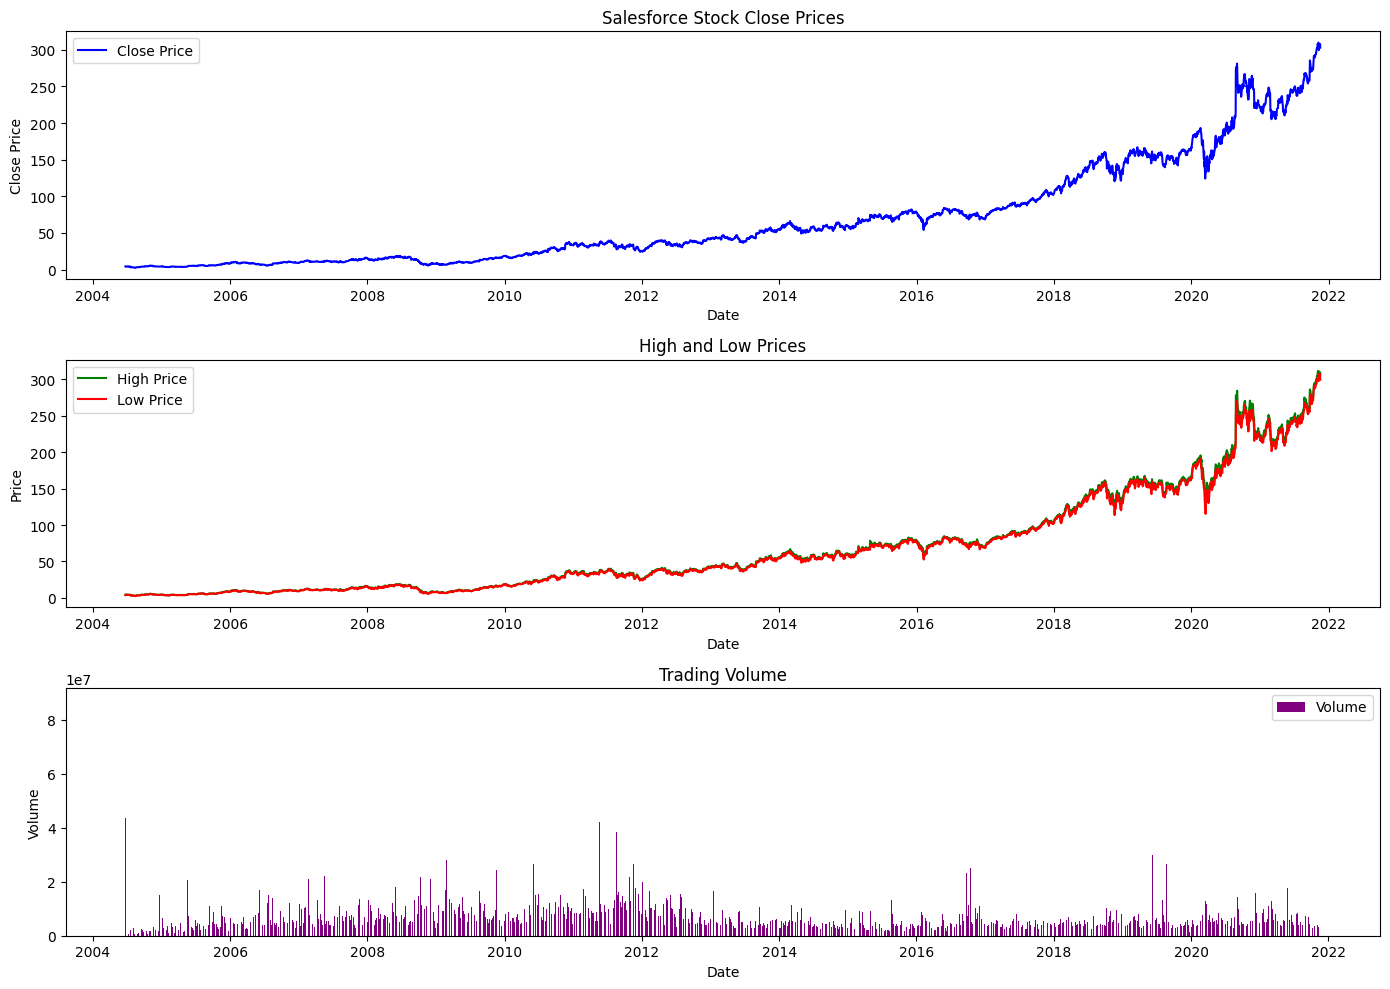

In [55]:
# Plotting
plt.figure(figsize=(14, 10))

# Plot Close Prices
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Salesforce Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Plot High and Low Prices
plt.subplot(3, 1, 2)
plt.plot(df.index, df['High'], label='High Price', color='green')
plt.plot(df.index, df['Low'], label='Low Price', color='red')
plt.title('High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Trading Volume
plt.subplot(3, 1, 3)
plt.bar(df.index, df['Volume'], label='Volume', color='purple')
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

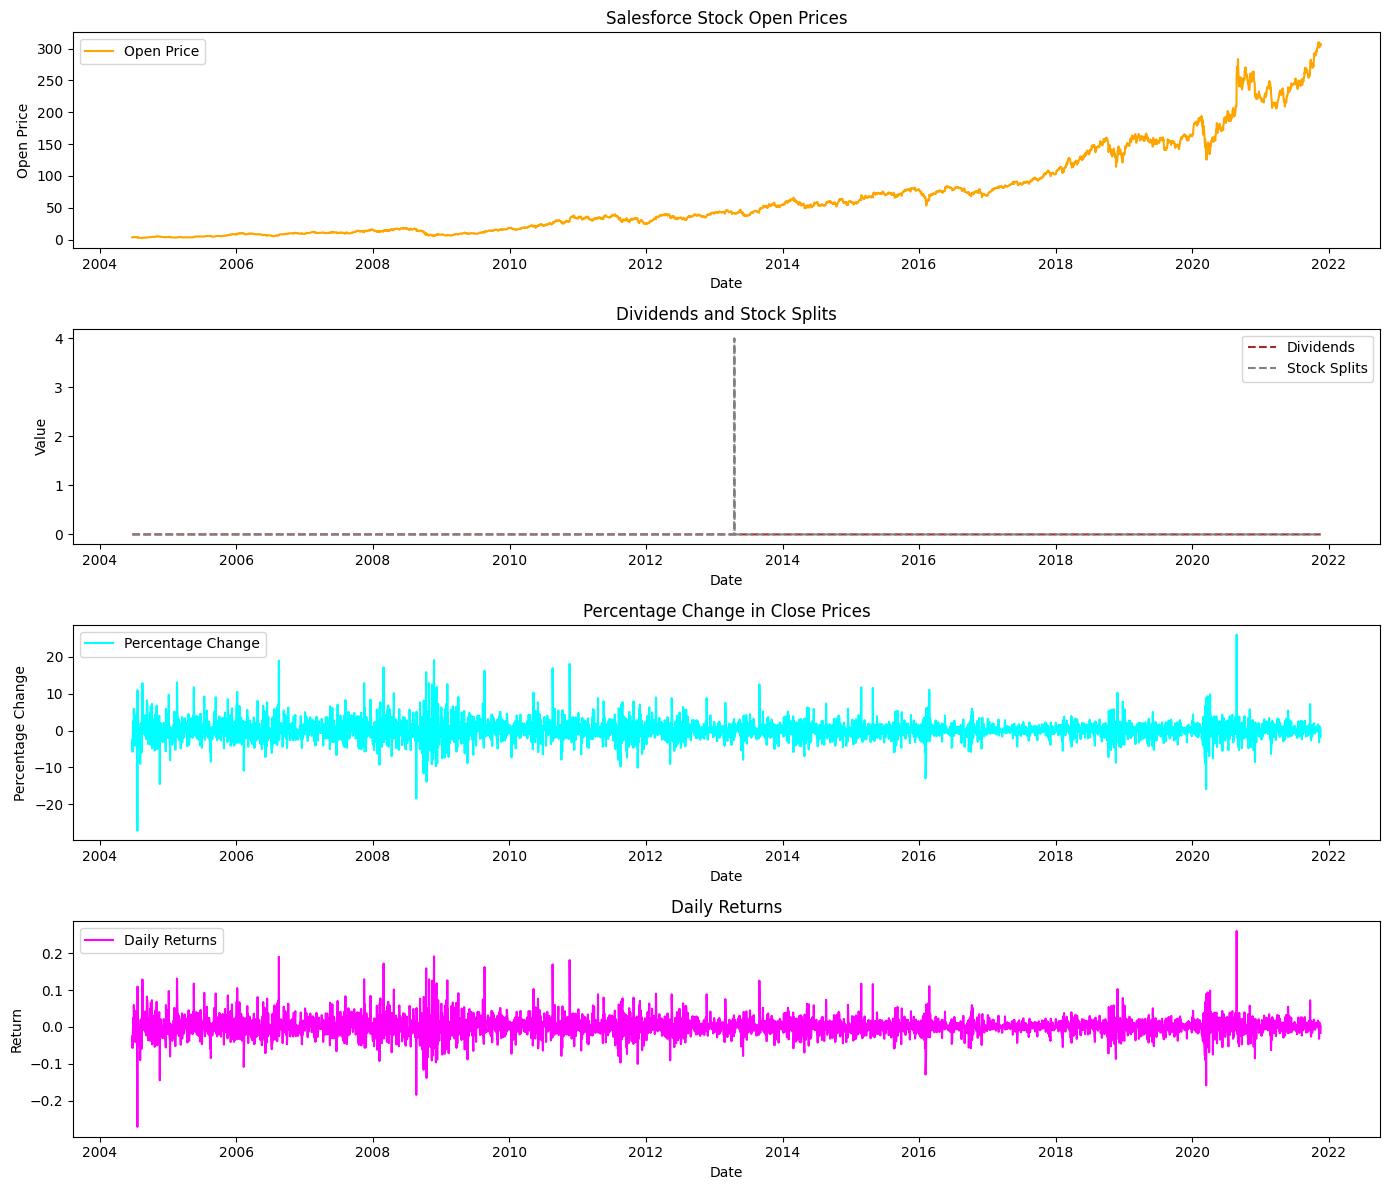

In [56]:
plt.figure(figsize=(14, 12))

# Plot Open Prices
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Open'], label='Open Price', color='orange')
plt.title('Salesforce Stock Open Prices')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# Plot Dividends and Stock Splits
plt.subplot(4, 1, 2)
plt.plot(df.index, df['Dividends'], label='Dividends', color='brown', linestyle='dashed')
plt.plot(df.index, df['Stock Splits'], label='Stock Splits', color='gray', linestyle='dashed')
plt.title('Dividends and Stock Splits')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Plot Percentage Change in Close Prices
percentage_change = df['Close'].pct_change() * 100
plt.subplot(4, 1, 3)
plt.plot(df.index, percentage_change, label='Percentage Change', color='cyan')
plt.title('Percentage Change in Close Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()

# Plotting Daily Returns
daily_returns = df['Close'].pct_change()
plt.subplot(4, 1, 4)
plt.plot(df.index, daily_returns, label='Daily Returns', color='magenta')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()

plt.tight_layout()
plt.show()


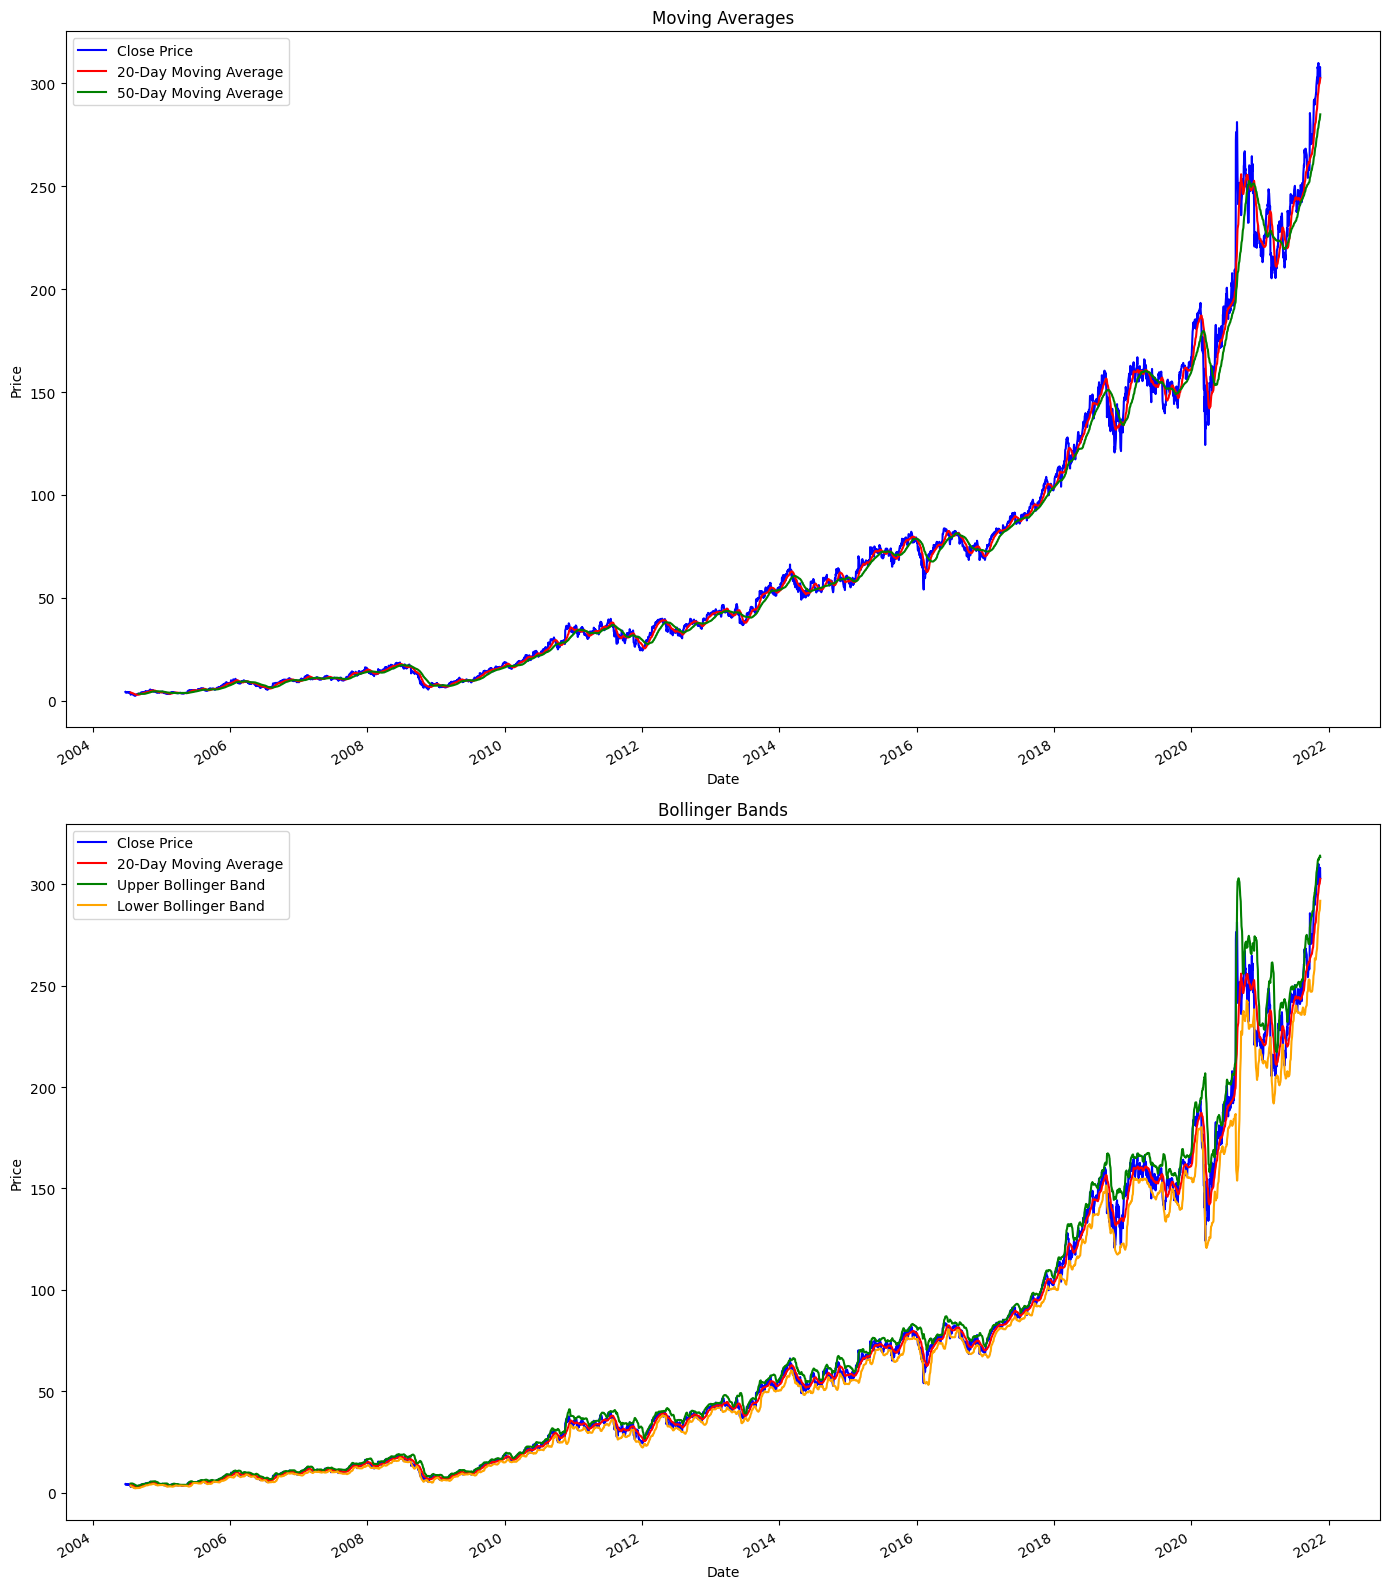

In [57]:
plt.figure(figsize=(14, 16))

# Plot Moving Averages
plt.subplot(2, 1, 1)
df['Close'].plot(label='Close Price', color='blue')
df['Close'].rolling(window=20).mean().plot(label='20-Day Moving Average', color='red')
df['Close'].rolling(window=50).mean().plot(label='50-Day Moving Average', color='green')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Bollinger Bands
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()

upper_band = rolling_mean + (2 * rolling_std)
lower_band = rolling_mean - (2 * rolling_std)

plt.subplot(2, 1, 2)
df['Close'].plot(label='Close Price', color='blue')
rolling_mean.plot(label='20-Day Moving Average', color='red')
upper_band.plot(label='Upper Bollinger Band', color='green')
lower_band.plot(label='Lower Bollinger Band', color='orange')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

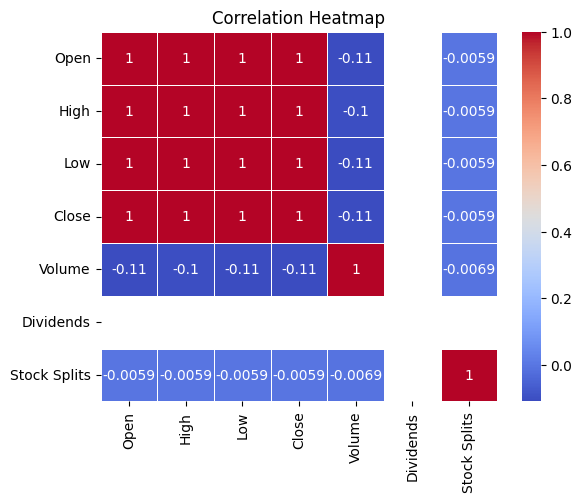

In [58]:
# Heatmap of Correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Feature scaling (MinMaxScaler)


In [59]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']])
df_scaled = pd.DataFrame(df_scaled, columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'])
df_scaled['Date'] = df.index
df_scaled.set_index('Date', inplace=True)

# Define DQN class


In [60]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(tf.keras.layers.Dense(24, activation='relu'))
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [61]:
# Preprocess function for the state
def preprocess_state(state):
    return np.reshape(state, [1, state_size])

In [62]:
# Initialize the environment
state_size = 7  # Number of features
action_size = 3  # Buy, Hold, Sell

In [63]:
# Initialize DQNAgent
agent = DQNAgent(state_size, action_size)

# Training the agent

In [64]:
num_episodes = 10  # Set the desired number of episodes
batch_size = 32
skip_factor = 5  # Skip every 5 data points
print_frequency = 1  # Set the desired frequency for printing progress

for episode in tqdm(range(num_episodes), desc='Training Episodes', unit='episode'):
    for i in range(0, len(df_scaled) - 1, skip_factor):
        state = preprocess_state(np.array([df_scaled.iloc[i].values]))
        next_state = preprocess_state(np.array([df_scaled.iloc[i + 1].values]))
        action = agent.act(state)

        # Assume a simple reward function (customize as needed)
        reward = 1 if df['Close'].iloc[i + 1] > df['Close'].iloc[i] else -1
        done = i + skip_factor >= len(df_scaled) - 1  # Done at the last step or when skipping is about to go out of bounds
        agent.remember(state, action, reward, next_state, done)

    agent.replay(batch_size)

print('Training completed.')


Training Episodes:   0%|          | 0/10 [00:00<?, ?episode/s]

1/1 [==============================] - 0s 26ms/step


Training Episodes:  10%|█         | 1/10 [00:09<01:24,  9.35s/episode]

1/1 [==============================] - 0s 40ms/step


Training Episodes:  20%|██        | 2/10 [00:20<01:21, 10.13s/episode]

1/1 [==============================] - 0s 26ms/step


Training Episodes:  30%|███       | 3/10 [00:29<01:09,  9.89s/episode]

1/1 [==============================] - 0s 25ms/step


Training Episodes:  40%|████      | 4/10 [00:39<00:58,  9.77s/episode]

1/1 [==============================] - 0s 27ms/step


Training Episodes:  50%|█████     | 5/10 [00:48<00:48,  9.72s/episode]

1/1 [==============================] - 0s 29ms/step


Training Episodes:  60%|██████    | 6/10 [00:58<00:38,  9.68s/episode]

1/1 [==============================] - 0s 26ms/step


Training Episodes:  70%|███████   | 7/10 [01:08<00:29,  9.86s/episode]

1/1 [==============================] - 0s 25ms/step


Training Episodes:  80%|████████  | 8/10 [01:18<00:20, 10.00s/episode]

1/1 [==============================] - 0s 26ms/step


Training Episodes:  90%|█████████ | 9/10 [01:30<00:10, 10.62s/episode]

1/1 [==============================] - 0s 26ms/step


Training Episodes: 100%|██████████| 10/10 [01:43<00:00, 10.32s/episode]

Training completed.


# Evaluate the trained agent

In [65]:
state = preprocess_state(np.array([df_scaled.iloc[0].values]))
total_reward = 0

for i in range(len(df_scaled) - 1):
    action = agent.act(state)
    next_state = preprocess_state(np.array([df_scaled.iloc[i + 1].values]))

    # Assume a simple reward function for evaluation
    reward = 1 if df['Close'].iloc[i + 1] > df['Close'].iloc[i] else -1
    done = i == len(df_scaled) - 2  # Done at the last step
    agent.remember(state, action, reward, next_state, done)
    total_reward += reward
    state = next_state

print(f'Total Evaluation Reward: {total_reward}')

1/1 [==============================] - 0s 24ms/step
Total Evaluation Reward: 122


# Plotting

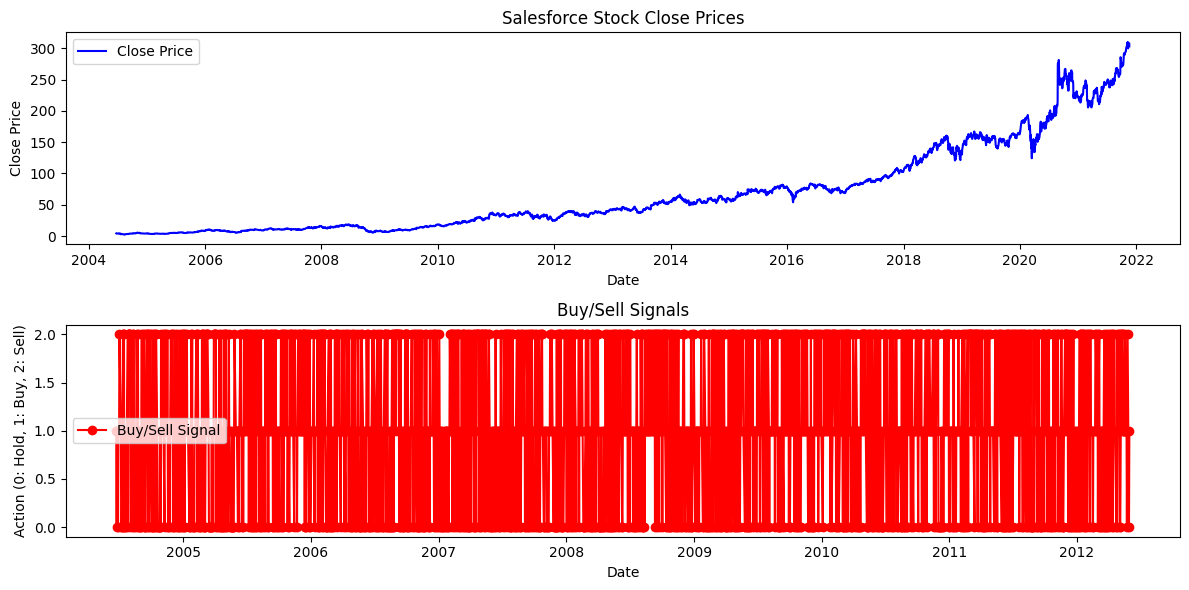

In [66]:
buy_sell_actions = [action[1] for action in agent.memory]  

plt.figure(figsize=(12, 6))

# Plot Close Prices
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Salesforce Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Plot Buy/Sell signals
plt.subplot(2, 1, 2)
# Make sure the dimensions match
plt.plot(df.index[:-1][:len(buy_sell_actions)], buy_sell_actions, label='Buy/Sell Signal', marker='o', color='red')
plt.title('Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Action (0: Hold, 1: Buy, 2: Sell)')
plt.legend()

plt.tight_layout()
plt.show()
